# Рыжова А. з3530903/90301 - практическая 5

In [58]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.metrics import silhouette_samples


In [59]:
C1 = 'Р'
V = ord(C1) % 5
print('Вариант:', V, '- Dry bean datasets')

Вариант: 1 - Dry bean datasets


### 1. Сформировать искусственные наборы данных в двумерном пространстве c характерными особенностями (по крайней мере, три набора).

#### make_blobs

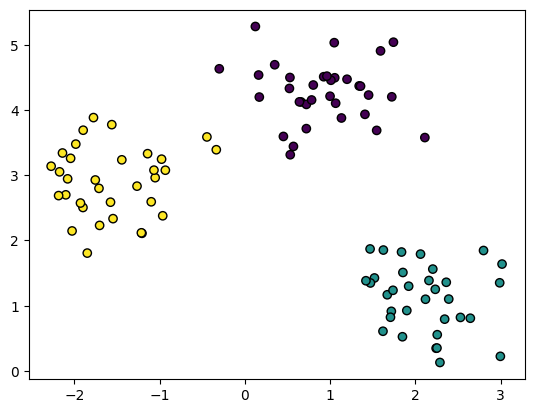

In [60]:
# генерируем точки в 2-мерном пространстве
b_1, b_2 = make_blobs(n_samples = 100, n_features=2, centers=3, 
                    cluster_std=0.5, shuffle=True, random_state=0)
# задаем цвет в соответствии с классами элементов (b_2)
plt.scatter(b_1[:, 0], b_1[:, 1], c=b_2, edgecolors='black')

#### make_circles

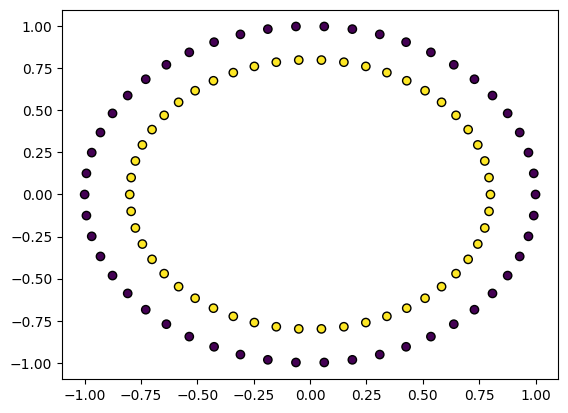

In [61]:
c_1, c_2 = make_circles()
plt.scatter(c_1[:, 0], c_1[:, 1], c=c_2, edgecolors='black')

#### make_moons

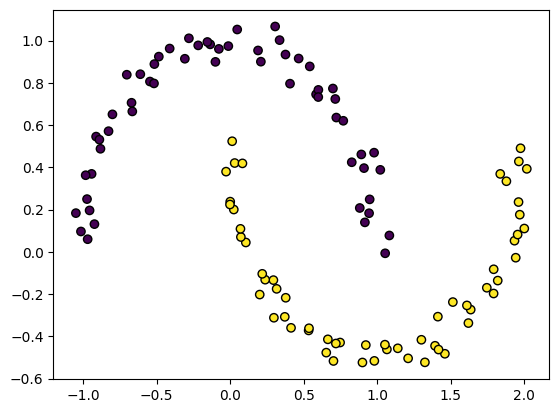

In [62]:
m_1, m_2 = make_moons(n_samples=115, noise=0.05)
plt.scatter(m_1[:, 0], m_1[:, 1], c=m_2, edgecolors='black')

### 2. Выполнить сравнительный анализ алгоритмов кластеризации kMeans, agglomerative clustering, DBScan с разными параметрами алгоритмов.

#### make_blobs

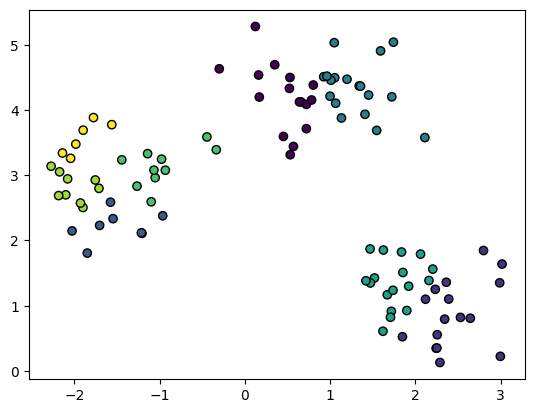

In [63]:
# кластеризация методом к-средних: метод кластеризации без учителя
# случайно выбирается центроид кластеров
km = KMeans(init="random")
y_km = km.fit_predict(b_1)
plt.scatter(b_1[:, 0], b_1[:, 1], c=y_km, edgecolors='black')

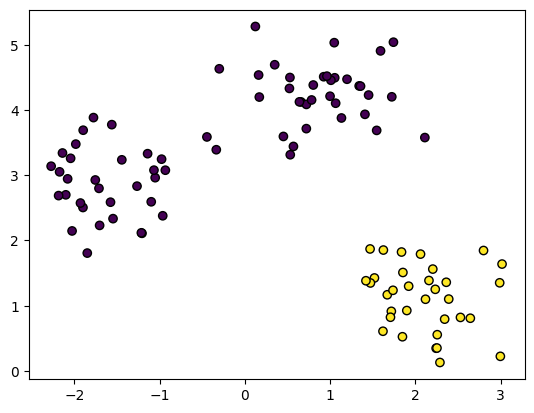

In [64]:
# Агломеративная кластеризация (AGNES)
# linkage - связь, полная - использует максимальные расстояния между всеми наблюдениями двух наборов
ac = AgglomerativeClustering(affinity='euclidean',linkage = 'complete')
y_ac = ac.fit_predict(b_1)
plt.scatter(b_1[:, 0], b_1[:, 1], c=y_ac, edgecolors='black')

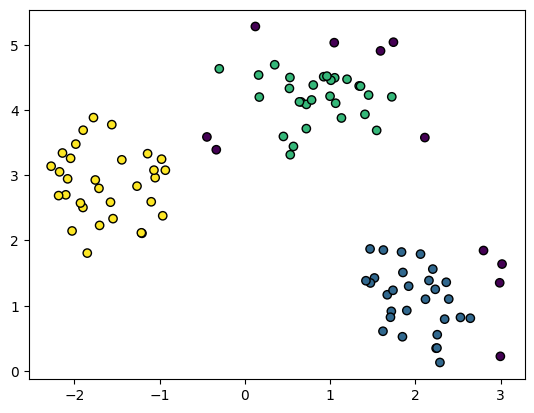

In [65]:
# DBSCAN - плотностной алгоритм пространственной кластеризации с присутствием шума
db = DBSCAN()
y_db = db.fit_predict(b_1)
plt.scatter(b_1[:, 0], b_1[:, 1], c=y_db, edgecolors='black')

#### make_circles

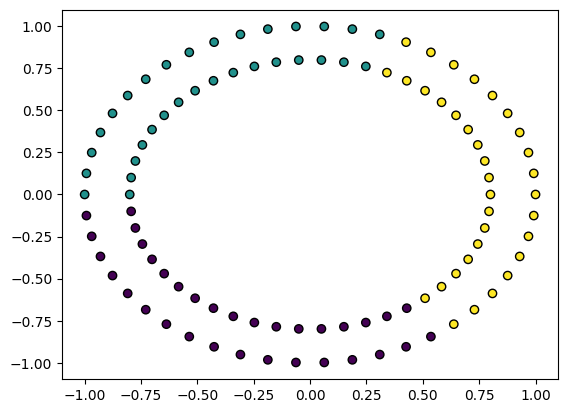

In [81]:
km2 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300,
                tol=1e-04, random_state=0)
y_km2 = km2.fit_predict(c_1)
plt.scatter(c_1[:, 0], c_1[:, 1], c=y_km2, edgecolors='black')

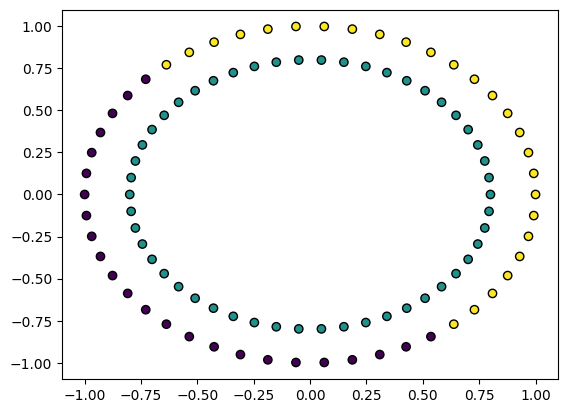

In [67]:
ac2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'single')
y_ac2 = ac2.fit_predict(c_1)
plt.scatter(c_1[:, 0], c_1[:, 1], c=y_ac2, edgecolors='black')

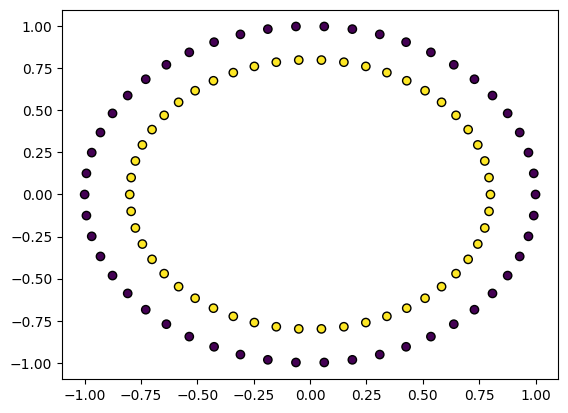

In [68]:
db2 = DBSCAN(eps=0.11, min_samples=3)
y_db2 = db2.fit_predict(c_1)
plt.scatter(c_1[:, 0], c_1[:, 1], c=y_db2, edgecolors='black')

#### make_moons

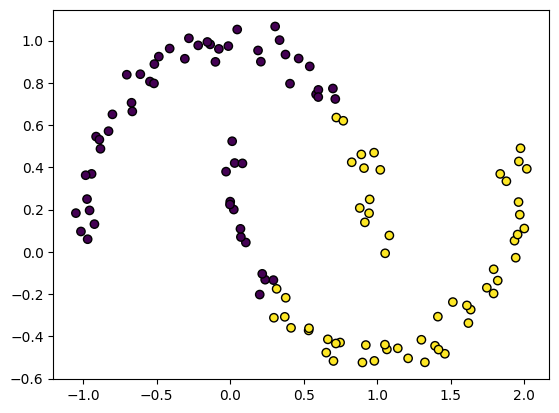

In [69]:
km3 = KMeans(n_clusters=2, random_state=0)
y_km3 = km3.fit_predict(m_1)
plt.scatter(m_1[:, 0], m_1[:, 1], c=y_km3, edgecolors='black')

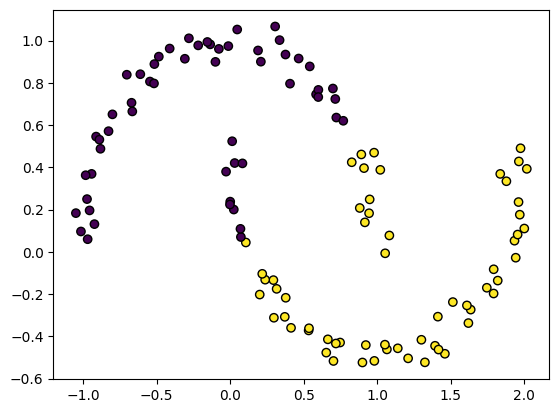

In [70]:
ac3 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage = 'average')
y_ac3 = ac3.fit_predict(m_1)
plt.scatter(m_1[:, 0], m_1[:, 1], c=y_ac3, edgecolors='black')

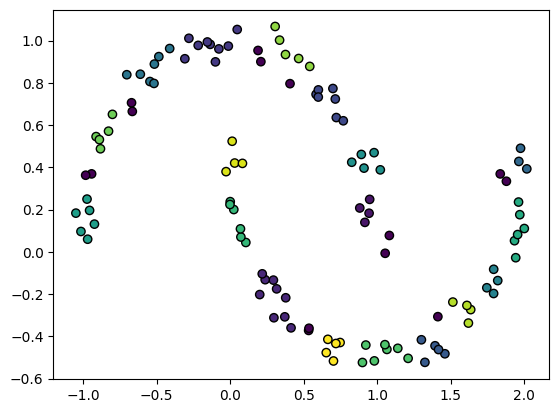

In [71]:
db3 = DBSCAN()
y_db3 = db2.fit_predict(m_1)
plt.scatter(m_1[:, 0], m_1[:, 1], c=y_db3, edgecolors='black')

### 3. Выбрать набор с многомерными данными для классификации в соответствии с вариантом

In [72]:
drybeans = pd.read_csv('Dry_Bean_Dataset.csv',sep =';',header=None)
# подготовка данных - поскольку классы строковые, то заменяем на числовые
drybeans = drybeans.iloc [1: , :]
drybeans.loc[drybeans[16] == 'SEKER', 16] = 1
drybeans.loc[drybeans[16] == 'BARBUNYA', 16] = 2
drybeans.loc[drybeans[16] == 'BOMBAY', 16] = 3
drybeans.loc[drybeans[16] == 'CALI', 16] = 4
drybeans.loc[drybeans[16] == 'DERMASON', 16] = 5
drybeans.loc[drybeans[16] == 'HOROZ', 16] = 6
drybeans.loc[drybeans[16] == 'SIRA', 16] = 7
drybeans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,28395,"610,291","208,1781167","173,888747","1,197191424","0,549812187",28715,"190,1410973","0,763922518","0,988855999","0,958027126","0,913357755","0,007331506","0,003147289","0,834222388","0,998723889",1
2,28734,"638,018","200,5247957","182,7344194","1,097356461","0,411785251",29172,"191,2727505","0,783968133","0,984985603","0,887033637","0,953860842","0,006978659","0,003563624","0,909850506","0,998430331",1
3,29380,"624,11","212,8261299","175,9311426","1,209712656","0,562727317",29690,"193,4109041","0,778113248","0,989558774","0,947849473","0,908774239","0,007243912","0,003047733","0,825870617","0,999066137",1
4,30008,"645,884","210,557999","182,5165157","1,153638059","0,498615976",30724,"195,4670618","0,782681273","0,976695743","0,903936374","0,928328835","0,007016729","0,003214562","0,861794425","0,994198849",1
5,30140,"620,134","201,8478822","190,2792788","1,06079802","0,333679658",30417,"195,896503","0,773098035","0,99089325","0,984877069","0,970515523","0,00669701","0,003664972","0,941900381","0,999166059",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,42097,"759,696","288,721612","185,9447054","1,55272833","0,765002201",42508,"231,5157988","0,71457428","0,990331232","0,916603122","0,80186515","0,006858484","0,001749094","0,642987719","0,998385248",5
13608,42101,"757,499","281,5763923","190,7131365","1,476439419","0,735702218",42494,"231,5267977","0,799942998","0,990751636","0,922015342","0,822252163","0,006688116","0,001885835","0,67609862","0,998218654",5
13609,42139,"759,321","281,5399279","191,1879789","1,472581747","0,734064781",42569,"231,6312612","0,729932444","0,989898753","0,918424091","0,822729703","0,00668122","0,001888271","0,676884164","0,996767264",5
13610,42147,"763,779","283,3826364","190,2757308","1,489326228","0,741054787",42667,"231,6532475","0,705389121","0,987812595","0,907906457","0,817457451","0,006723673","0,001852025","0,668236684","0,99522242",5


In [73]:
# все столбцы имеют тип obj, в столбцах вместо '.' стоят ',', что мешает нормальному формированию графика 
# (значения не переводятся во float - исправляем)
for i in range(0,len(drybeans.columns)):
    if (drybeans[i].dtype == 'object') and (i != 16):
        drybeans[i] = drybeans[i].apply(lambda x: float(x.split()[0].replace(',', '.')))

### 4. Выполнить кластеризацию объектов без учёта признака класса. 

In [74]:
# исходные данные
x = drybeans.iloc[:,0:-1]
y = drybeans.iloc[:,-1:]

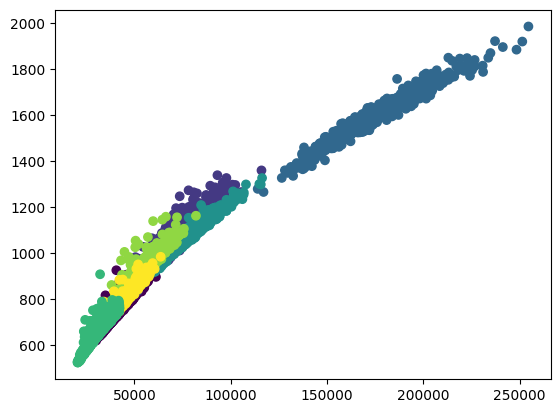

In [75]:
# график зависимости периметра от области
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y)

rand score = 0.8035901074308279
clusters = {0: 303, 1: 1917, 2: 4191, 3: 217, 4: 1197, 5: 3179, 6: 2607}


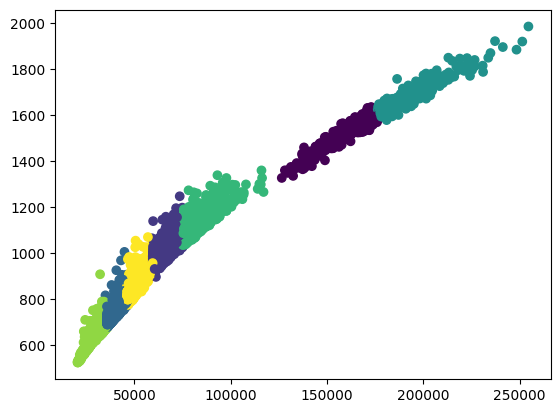

In [76]:
from sklearn.metrics.cluster import rand_score
# 7 кластеров - 7 классов
# кластеризация k-means
kmcl = KMeans(n_clusters=7)
ycl = kmcl.fit_predict(x)

print('rand score = {0}'.format(rand_score(y.iloc[:,0],ycl)))
tempu, tempc = np.unique(ycl, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=ycl)

### 5. Оценить качество построенных кластеров с помощью оценки Silhoutte.

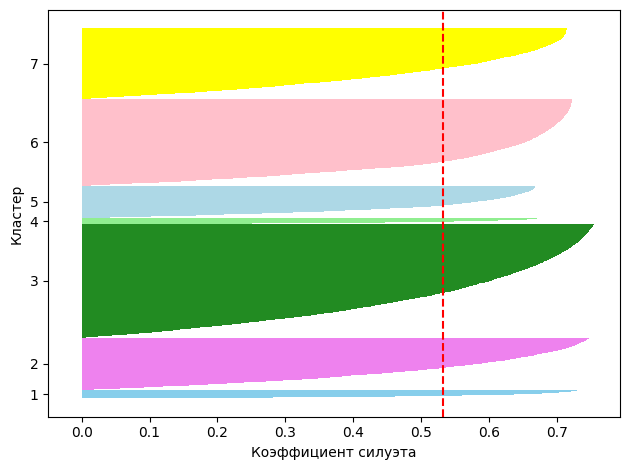

In [77]:
cluster_labels = np.unique(ycl)
silhouette_values = silhouette_samples(x, ycl, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# выводим оценки сначала для для одного кластера, затем для другого и т.д.
for c in cluster_labels:
    c_silhouette_values = silhouette_values[ycl == c]
    c_silhouette_values.sort()
    y_ax_upper += len(c_silhouette_values)
    color = ["skyblue", "violet", "forestgreen", "lightgreen", "lightblue", "pink", "yellow"][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_values, 
             height = 1.0, 
             edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_values)
# отображаем усредненный уровень silhoutte по всем объектам
silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

##### AgglomerativeClustering

In [78]:
# кластеризация AgglomerativeClustering + silhouette
ac_x = AgglomerativeClustering(n_clusters=7)
y_ac_x = ac_x.fit_predict(x)

print('Метки кластеров: %s' % y_ac_x)

Метки кластеров: [4 4 4 ... 1 1 1]


<BarContainer object of 7 artists>

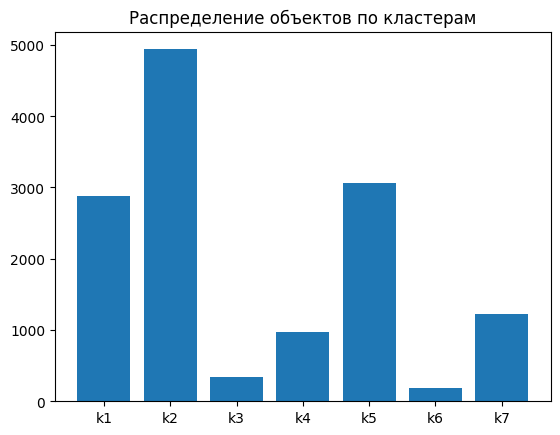

In [79]:
# Агрегируем результаты
cluster_indices, counts = np.unique(y_ac_x, return_counts = True)
cluster_names = ["k{0}".format(idx + 1) for idx in cluster_indices]
plt.title("Распределение объектов по кластерам")
plt.bar(x = cluster_names, height = counts)

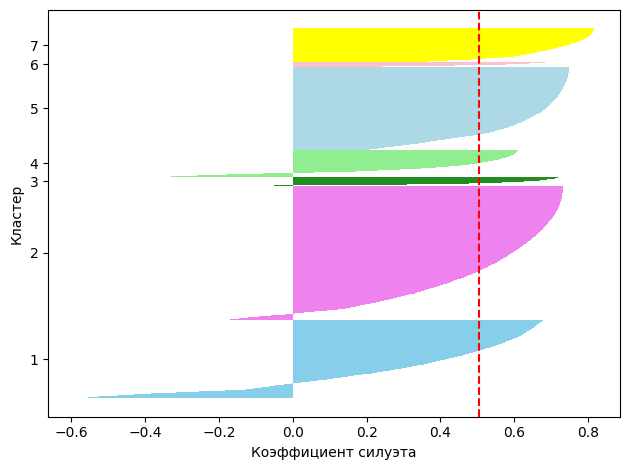

In [80]:
cluster_labels = np.unique(y_ac_x)
silhouette_values = silhouette_samples(x, y_ac_x, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# выводим оценки сначала для для одного кластера, затем для другого и т.д.
for c in cluster_labels:
    c_silhouette_values = silhouette_values[y_ac_x == c]
    c_silhouette_values.sort()
    y_ax_upper += len(c_silhouette_values)
    color = ["skyblue", "violet", "forestgreen", "lightgreen", "lightblue", "pink", "yellow"][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_values, 
             height = 1.0, 
             edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_values)
# отображаем усредненный уровень silhoutte по всем объектам
silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()